In [1143]:
import os
from pathlib import Path

current_folder = globals()['_dh'][0]
parent = Path(current_folder).parent
os.chdir(parent)
print(os.getcwd())

/home/josalhor/Desktop/clothes-extractor


In [1144]:
import src.dataset as dataset
import importlib
importlib.reload(dataset)

<module 'src.dataset' from '/home/josalhor/Desktop/clothes-extractor/src/dataset.py'>

In [1145]:
from src.dataset import ClothesDataLoader, ClothesDataset
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [1146]:
!pwd

/home/josalhor/Desktop/clothes-extractor


In [1147]:
dataset_dir: str = "./datasets/zalando-hd-resized"
dataset_mode: str = "train"
batch_size: int = 1
workers: int = 1
load_height: int = 1024
load_width: int = 768

clothes_dataset = ClothesDataset(
    dataset_dir=dataset_dir,
    dataset_mode=dataset_mode,
    load_height=load_height,
    load_width=load_width
)
clothes_loader = ClothesDataLoader(
    dataset=clothes_dataset,
    batch_size=batch_size,
    num_workers=workers
)


tensor([2, 0, 3, 1]) 0.8973758220672607 1.1166247129440308 1.2811540365219116 0.029383545741438866


In [1148]:
result = clothes_dataset[2]
print('Imaname: ', result["img_name"])
print('Img shape: ', result["img"].shape)
print('Cloth shape: ', result["cloth"].shape)
print('Cloth Mask: ', result["cloth_mask"].shape)
print('Agnostic Mask: ', result["agnostic_mask"].shape)

# Similarly, we can sample a BATCH from the dataloader by running over its iterator
# iter_ = iter(clothes_loader)
# bimg, blabel = next(iter_)
# print('Batch Img shape: ', bimg.shape)
# print('Batch Label shape: ', blabel.shape)
# print('Batch Img shape: ', bimg.shape)
# print('Batch Label shape: ', blabel.shape)
# print(f'The Batched tensors return a collection of {bimg.shape[0]} grayscale images \
# ({bimg.shape[1]} channel, {bimg.shape[2]} height pixels, {bimg.shape[3]} width \
# pixels)')
# print(f'In the case of the labels, we obtain {blabel.shape[0]} batched integers, one per image')

tensor([3, 1, 0, 2]) 0.959351122379303 0.7683923244476318 1.0929304361343384 0.02095913328230381
Imaname:  08020_00.jpg
Img shape:  torch.Size([3, 768, 768])
Cloth shape:  torch.Size([3, 768, 768])
Cloth Mask:  torch.Size([3, 768, 768])
Agnostic Mask:  torch.Size([3, 768, 768])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2, 3, 0, 1]) 1.0634968280792236 1.0285149812698364 0.7506415843963623 
0.04694827273488045

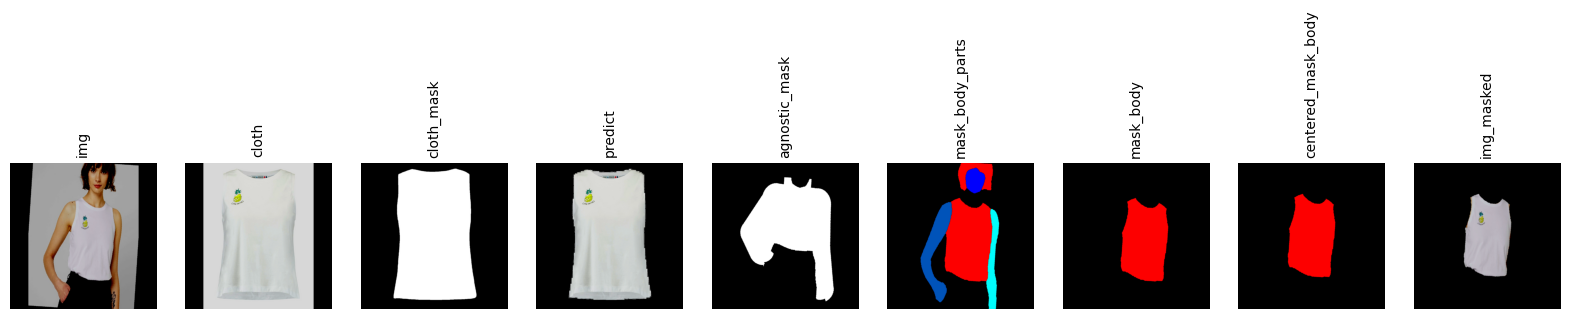

In [1149]:
image_keys = ["img", "cloth", "cloth_mask", "predict", "agnostic_mask", "mask_body_parts", "mask_body", "centered_mask_body", "img_masked"]
fig, axes = plt.subplots(1, len(image_keys), figsize=(20, 20))

for ax, key in zip(axes, image_keys):
    ax.imshow(result[key].permute(1, 2, 0))
    ax.axis('off')
    ax.set_title(key, rotation=90, fontsize=10)